In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
x = pd.read_csv("xdata.csv",index_col=False,usecols=[1,2])
y = pd.read_csv("ydata.csv",index_col=False,usecols=[1])

X_data,y_data = x.values,y.values

In [9]:
X_data.shape

(399, 2)

In [11]:
y_data.shape

(399, 1)

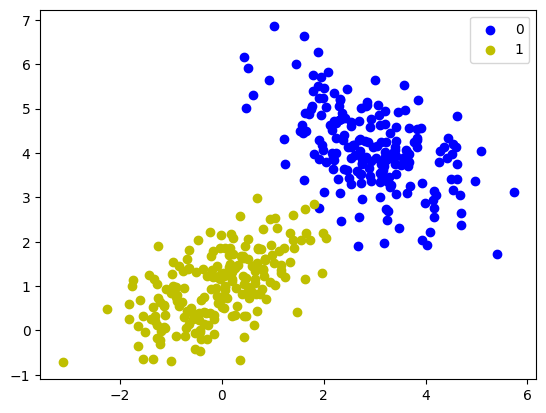

In [27]:
plt.scatter(X_data[y_data.reshape(-1) == 0][:,0],X_data[y_data.reshape(-1) == 0][:,1],c='blue',label = '0')
plt.scatter(X_data[y_data.reshape(-1) == 1][:,0],X_data[y_data.reshape(-1) == 1][:,1],c='y',label = '1')
plt.legend()
plt.show()

In [36]:
class KNNClassifier:
    def __init__(self,k = 5):
        self.k = k
    
    def fit(self,x,y):
        self.X = x
        self.y = y
        
    def distance_formula(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    def predict_1(self,t):
        distances = [] #Tuple 0-> dist, 1->Label
        
        for i in range(len(self.X)):
            distances.append((self.distance_formula(self.X[i],t),self.y[i]))

        distances = sorted(distances,key = lambda x:x[0])[:self.k]
        
        Klabels = []
        for dist,label in distances:
            Klabels.append(label)

        labels,counts = np.unique(Klabels,return_counts=True)
        predLabel = labels[np.argmax(counts)]
        
        prob = counts[np.argmax(counts)]/self.k
        # print("Probablity:", prob)
        return predLabel

    def predict(self,t):
        predLabels = []
        for dp in range(len(t)):
            predLabels.append(self.predict_1(t[dp]))
        return np.array(predLabels)

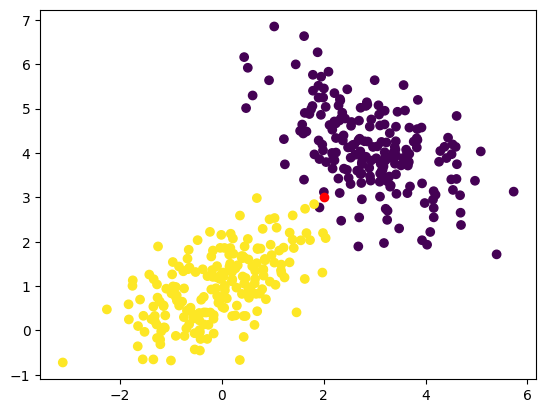

In [37]:
t = np.array([2,3])
plt.scatter(X_data[:,0],X_data[:,1],c=y_data.reshape(-1))
plt.scatter(t[0],t[1],c = 'r')
# plt.legend()
plt.show()

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,train_size = 0.8)
clf = KNNClassifier(1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [47]:
y_test = y_test.reshape(-1)
acc = np.sum(y_pred == y_test)/y_pred.shape[0]
print(acc)

0.975


In [5]:
l = [1,0,1,0,1,1,0,1,0,0,0,0,0]
np.unique(l,return_counts=True),np.argmax(np.unique(l,return_counts=True)[1])

((array([0, 1]), array([8, 5], dtype=int64)), 0)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [53]:
std = StandardScaler()
X_data = std.fit_transform(X_data)
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data.reshape(-1),train_size = 0.8)

In [54]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [58]:
# clf.score(x_test,y_test)
accuracy_score(y_test,y_pred)

1.0